# Customer Segmentation and Retention Strategy Tutorial

## Step 1: Data Loading and Initial Exploration

### What we're doing:
In this step, we'll load the e-commerce dataset and perform an initial exploration to understand its structure and contents.

### Why we're doing it:
Understanding our data is crucial for identifying potential insights and determining the appropriate analysis methods for our customer segmentation project.

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ecommerce_data_week2.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   customer_id  order_id  order_date  product_id product_category  \
0           52      1001  2023-01-01         134           Sports   
1           93      1002  2023-01-02         108      Electronics   
2           15      1003  2023-01-03         140           Sports   
3           72      1004  2023-01-04         183           Sports   
4           61      1005  2023-01-05         142       Home Decor   

   product_price  quantity     revenue  discount web_traffic_source  \
0            392         3  132.491483        45             Google   
1             77         4  179.868736        43             Google   
2            375         1  350.985646        43           Facebook   
3            381         3  360.287920        30             Direct   
4            223         3  336.964856        32           Facebook   

  customer_age_group customer_region  customer_lifetime_value  
0              26-35          London                     1123  
1              26-35      Sout

After executing the code above, examine the output and reflect on the following:
- What columns are available in the dataset?
- Are there any missing values?
- What data types are present?

### Explanation:
The dataset contains information about customer orders, including customer demographics, order details, and revenue. We can see columns such as 'customer_id', 'order_date', 'product_category', 'revenue', and 'customer_age_group'. This information will be valuable for our segmentation analysis.

## Step 2: Data Preprocessing

### What we're doing:
We'll clean the data and prepare it for analysis by handling missing values, converting data types, and creating derived features.

### Why we're doing it:
Clean, well-structured data is essential for accurate analysis and insights. By preprocessing our data, we ensure that our subsequent analyses are based on reliable information.

In [24]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Create a 'total_spend' column
df['total_spend'] = df['revenue'] * (1 - df['discount'] / 100)

# Handle missing values in 'customer_age_group' and 'customer_region'
df['customer_age_group'].fillna('Unknown', inplace=True)
df['customer_region'].fillna('Unknown', inplace=True)

# Display summary statistics
print(df.describe())

       customer_id     order_id           order_date  product_id  \
count  1000.000000  1000.000000                 1000  1000.00000   
mean     50.128000  1500.500000  2024-05-14 12:00:00   149.94800   
min       1.000000  1001.000000  2023-01-01 00:00:00   101.00000   
25%      24.000000  1250.750000  2023-09-07 18:00:00   125.00000   
50%      51.000000  1500.500000  2024-05-14 12:00:00   149.00000   
75%      75.000000  1750.250000  2025-01-19 06:00:00   175.00000   
max     100.000000  2000.000000  2025-09-26 00:00:00   200.00000   
std      29.573505   288.819436                  NaN    29.13304   

       product_price     quantity      revenue     discount  \
count    1000.000000  1000.000000  1000.000000  1000.000000   
mean      259.177000     2.473000   395.186639    24.684000   
min        10.000000     1.000000    91.605571     0.000000   
25%       136.000000     1.000000   280.545795    13.000000   
50%       267.500000     2.000000   395.893598    25.000000   
75%      

C:\Users\garet\AppData\Local\Temp\ipykernel_14640\3411527308.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_age_group'].fillna('Unknown', inplace=True)
C:\Users\garet\AppData\Local\Temp\ipykernel_14640\3411527308.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


After executing the code above, consider:
- How many orders are in the dataset?
- What is the average total spend per order?
- Are there any unusual values that need further investigation?

### Explanation:
We've prepared our data for analysis by converting the order date to a datetime format, calculating the total spend after discount, and handling missing values in categorical columns. The summary statistics provide an overview of our numerical variables, helping us identify any potential outliers or unusual patterns.

## Step 3: Customer Segmentation using RFM Analysis

### What we're doing:
We'll perform an RFM (Recency, Frequency, Monetary) analysis to segment customers based on their purchasing behaviour.

### Why we're doing it:
RFM analysis is a powerful method for customer segmentation that takes into account how recently a customer made a purchase, how often they purchase, and how much they spend. This segmentation will help us identify different customer groups for targeted retention strategies.

In [25]:
# Calculate RFM metrics
latest_date = df['order_date'].max()
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'total_spend': 'sum'
})
rfm.columns = ['recency', 'frequency', 'monetary']

# Create RFM score
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)
r_quartiles = pd.qcut(rfm['recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['monetary'], q=4, labels=m_labels)
rfm['R'] = r_quartiles
rfm['F'] = f_quartiles
rfm['M'] = m_quartiles
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Display the first few rows of the RFM dataframe
print(rfm.head())

             recency  frequency     monetary  R  F  M RFM_Score
customer_id                                                    
1                 46         16  4561.686818  3  4  4       344
2                 32         13  4017.174996  3  4  4       344
3                 26         12  3332.527600  4  3  3       433
4                 91         11  2245.185205  2  3  1       231
5                 68         11  3515.332097  2  3  3       233


After executing the code above, reflect on:
- What does an RFM score of '444' represent?
- How might we use these scores to create meaningful customer segments?

### Explanation:
We've calculated RFM scores for each customer based on their purchase history. The recency, frequency, and monetary values are divided into quartiles and assigned scores from 1 to 4. A higher score indicates better customer behaviour in that category. For example, an RFM score of '444' represents a customer who has purchased recently, frequently, and with high monetary value.

## Step 4: Defining Customer Segments

### What we're doing:
Based on the RFM scores, we'll define customer segments and analyse their characteristics.

### Why we're doing it:
Clearly defined customer segments allow us to tailor our retention strategies to different groups of customers based on their purchasing behaviour.

Customer_Segment
Lost Customers       0.42
Regular Customers    0.34
Loyal Customers      0.16
Best Customers       0.08
Name: proportion, dtype: float64


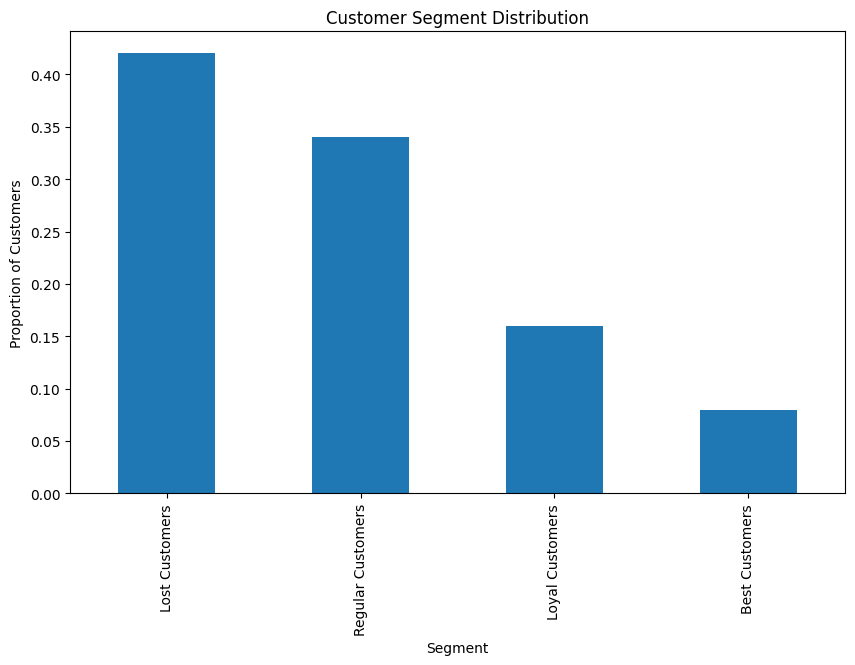

In [26]:
# Define customer segments
def segment_customers(row):
    if row['RFM_Score'] in ['444', '434', '443', '433']:
        return 'Best Customers'
    elif row['R'] in [3, 4]:
        return 'Lost Customers'
    elif row['F'] in [3, 4] and row['M'] in [3, 4]:
        return 'Loyal Customers'
    elif row['R'] in [3, 4] and row['F'] in [1, 2] and row['M'] in [1, 2]:
        return 'New Customers'
    else:
        return 'Regular Customers'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

# Analyse segment distribution
segment_distribution = rfm['Customer_Segment'].value_counts(normalize=True)
print(segment_distribution)

# Visualise segment distribution
plt.figure(figsize=(10, 6))
segment_distribution.plot(kind='bar')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Proportion of Customers')
plt.show()

After executing the code above, consider:
- Which customer segment is the largest?
- What might be some characteristics of each segment?
- How could these segments inform our retention strategies?

### Explanation:
We've defined five customer segments based on RFM scores: Best Customers, Loyal Customers, New Customers, Regular Customers, and Lost Customers. The distribution shows the proportion of customers in each segment. This segmentation provides a foundation for developing targeted retention strategies.

## Step 5: Analysing Segment Characteristics

### What we're doing:
We'll analyse the characteristics of each customer segment to gain deeper insights into their behaviour.

### Why we're doing it:
Understanding the unique characteristics of each segment will help us develop more effective, targeted retention strategies.

Average Total Spend by Segment:
Customer_Segment
Loyal Customers      321.699486
Lost Customers       320.569278
Regular Customers    313.502140
Best Customers       300.339780
Name: total_spend, dtype: float64

Product Category Preferences by Segment:
product_category      Books  Clothing  Electronics  Home Decor    Sports
Customer_Segment                                                        
Best Customers     0.218487  0.235294     0.159664    0.176471  0.210084
Lost Customers     0.213235  0.215686     0.196078    0.178922  0.196078
Loyal Customers    0.242009  0.205479     0.196347    0.155251  0.200913
Regular Customers  0.185039  0.224409     0.188976    0.161417  0.240157


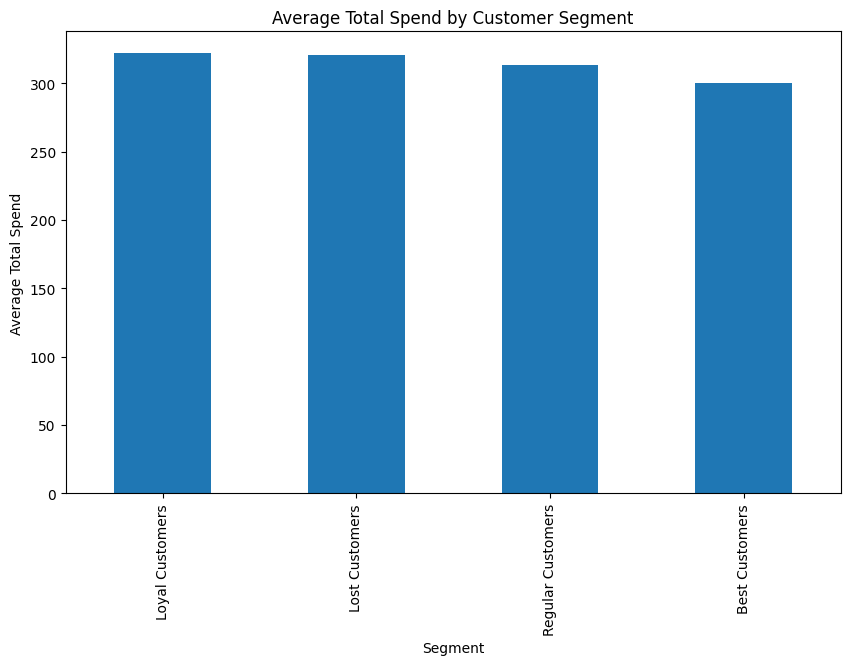

In [27]:
# Merge RFM data with original dataset
df_with_segments = df.merge(rfm[['Customer_Segment']], left_on='customer_id', right_index=True)

# Analyse average total spend by segment
avg_spend_by_segment = df_with_segments.groupby('Customer_Segment')['total_spend'].mean().sort_values(ascending=False)
print("Average Total Spend by Segment:")
print(avg_spend_by_segment)

# Analyse preferred product categories by segment
category_preferences = df_with_segments.groupby(['Customer_Segment', 'product_category']).size().unstack(fill_value=0)
category_preferences_pct = category_preferences.div(category_preferences.sum(axis=1), axis=0)
print("\nProduct Category Preferences by Segment:")
print(category_preferences_pct)

# Visualise average total spend by segment
plt.figure(figsize=(10, 6))
avg_spend_by_segment.plot(kind='bar')
plt.title('Average Total Spend by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Total Spend')
plt.show()

After executing the code above, reflect on:
- Which segment has the highest average total spend?
- Are there notable differences in product category preferences between segments?
- How might these insights inform our retention strategies for each segment?

### Explanation:
By analysing the average total spend and product category preferences for each segment, we gain valuable insights into their behaviour. This information can be used to tailor retention strategies, such as personalised promotions or product recommendations, for each segment.

## Step 6: Developing Retention Strategies

### What we're doing:
Based on our analysis, we'll propose targeted retention strategies for each customer segment.

### Why we're doing it:
Tailored retention strategies are more likely to be effective in maintaining and improving customer loyalty across different segments.

In [29]:
# Example retention strategies based on our analysis
retention_strategies = {
    'Best Customers': [
        'Implement a VIP programme with exclusive benefits',
        'Offer early access to new products or sales',
        'Provide personalised customer service'
    ],
    'Loyal Customers': [
        'Create a loyalty rewards programme',
        'Send personalised product recommendations based on past purchases',
        'Offer bundle deals on frequently purchased product categories'
    ],
    'New Customers': [
        'Send welcome series emails with product education',
        'Offer a discount on the second purchase',
        'Provide excellent customer support to ensure a positive first experience'
    ],
    'Regular Customers': [
        'Implement a "win-back" campaign for customers who have not purchased recently',
        'Offer promotions on products in their preferred categories',
        'Send targeted emails highlighting new products or features'
    ],
    'Lost Customers': [
        'Conduct surveys to understand reasons for churn',
        'Offer a substantial "come back" discount',
        'Re-engage through retargeting ads on social media'
    ]
}

# Print retention strategies for each segment
for segment, strategies in retention_strategies.items():
    print(f"\nRetention Strategies for {segment}:")
    for strategy in strategies:
        print(f"- {strategy}")


Retention Strategies for Best Customers:
- Implement a VIP programme with exclusive benefits
- Offer early access to new products or sales
- Provide personalised customer service

Retention Strategies for Loyal Customers:
- Create a loyalty rewards programme
- Send personalised product recommendations based on past purchases
- Offer bundle deals on frequently purchased product categories

Retention Strategies for New Customers:
- Send welcome series emails with product education
- Offer a discount on the second purchase
- Provide excellent customer support to ensure a positive first experience

Retention Strategies for Regular Customers:
- Implement a "win-back" campaign for customers who have not purchased recently
- Offer promotions on products in their preferred categories
- Send targeted emails highlighting new products or features

Retention Strategies for Lost Customers:
- Conduct surveys to understand reasons for churn
- Offer a substantial "come back" discount
- Re-engage thro

After reviewing the proposed strategies, consider:
- How do these strategies align with the characteristics of each segment?
- What additional data might be useful for refining these strategies?
- How could we measure the effectiveness of these strategies once implemented?

### Explanation:
These proposed retention strategies are tailored to the characteristics and behaviours of each customer segment. By addressing the specific needs and preferences of each group, we can improve customer retention and potentially increase customer lifetime value.

## Conclusion and Key Takeaways

In this tutorial, we've walked through the process of customer segmentation and developing retention strategies using e-commerce data. Here are the key takeaways:

1. We used RFM analysis to segment customers based on their purchasing behaviour.
2. We identified five distinct customer segments: Best Customers, Loyal Customers, New Customers, Regular Customers, and Lost Customers.
3. We analysed the characteristics of each segment, including average total spend and product category preferences.
4. Based on these insights, we proposed targeted retention strategies for each segment.

This analysis demonstrates how data-driven insights can inform customer retention efforts. By understanding the unique characteristics and needs of different customer segments, businesses can develop more effective, personalised strategies to improve customer loyalty and increase revenue.

Next steps could include:
- Implementing A/B testing to measure the effectiveness of different retention strategies
- Incorporating additional data sources, such as customer service interactions or website behaviour
- Developing a dashboard to track key metrics for each customer segment over time

Remember, customer segmentation and retention strategies should be regularly reviewed and updated as customer behaviours and market conditions change.